In [1]:
import pandas as pd
import numpy as np

In [2]:
kg_df = pd.read_csv("kg.csv")

C:\Users\micha\AppData\Local\Temp\ipykernel_1652\3914403636.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  kg_df = pd.read_csv("kg.csv")


In [3]:
kg_df

,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
0,protein_protein,ppi,0,9796,gene/protein,PHYHIP,NCBI,8889,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,1,7918,gene/protein,GPANK1,NCBI,2798,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,2,8233,gene/protein,ZRSR2,NCBI,5646,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,3,4899,gene/protein,NRF1,NCBI,11592,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,4,5297,gene/protein,PI4KA,NCBI,2122,8601,gene/protein,RGS20,NCBI
...,...,...,...,...,...,...,...,...,...,...,...,...
8100493,anatomy_protein_absent,expression absent,66747,4720,anatomy,cerebellar vermis,UBERON,5259,140,gene/protein,ADORA3,NCBI
8100494,anatomy_protein_absent,expression absent,63824,1377,anatomy,quadriceps femoris,UBERON,58254,105378952,gene/protein,KLF18,NCBI
8100495,anatomy_protein_absent,expression absent,63826,1379,anatomy,vastus lateralis,UBERON,58254,105378952,gene/protein,KLF18,NCBI
8100496,anatomy_protein_absent,expression absent,64523,2084,anatomy,heart left ventricle,UBERON,58254,105378952,gene/protein,KLF18,NCBI


In [4]:
kg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100498 entries, 0 to 8100497
Data columns (total 12 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   relation          object
 1   display_relation  object
 2   x_index           int64 
 3   x_id              object
 4   x_type            object
 5   x_name            object
 6   x_source          object
 7   y_index           int64 
 8   y_id              object
 9   y_type            object
 10  y_name            object
 11  y_source          object
dtypes: int64(2), object(10)
memory usage: 741.6+ MB


In [5]:
#Replace all node names with name 'biological_process' to 'biological_process_name' as this is causing an error when created The Graph
kg_df['x_name'] = kg_df['x_name'].replace({'biological_process': 'biological_process_name', 'molecular_function': 'molecular_function_name', 'cellular_component': 'cellular_component_name'})
kg_df['y_name'] = kg_df['y_name'].replace({'biological_process': 'biological_process_name', 'molecular_function': 'molecular_function_name', 'cellular_component': 'cellular_component_name'})

# Part 1

## Question 1: Number of unique relations and count of each

In [6]:
#Find count of each relation
relations = kg_df["relation"].value_counts()
#Calculates number of unique relations
no_of_relations = np.size(relations)

print("There are {} unique relation types in the dataset".format(no_of_relations))
relations

There are 30 unique relation types in the dataset


relation
anatomy_protein_present       3036406
drug_drug                     2672628
protein_protein                642150
disease_phenotype_positive     300634
bioprocess_protein             289610
cellcomp_protein               166804
disease_protein                160822
molfunc_protein                139060
drug_effect                    129568
bioprocess_bioprocess          105772
pathway_protein                 85292
disease_disease                 64388
contraindication                61350
drug_protein                    51306
anatomy_protein_absent          39774
phenotype_phenotype             37472
anatomy_anatomy                 28064
molfunc_molfunc                 27148
indication                      18776
cellcomp_cellcomp                9690
phenotype_protein                6660
off-label use                    5136
pathway_pathway                  5070
exposure_disease                 4608
exposure_exposure                4140
exposure_bioprocess              3250
exp

## Question 2: Number of unique node types and count of each

In [7]:
#Find count of each node type
node_types = kg_df["x_type"].value_counts()
#Calculates number of unique node types
no_of_nodes = np.size(node_types)

print("There are {} unique node types in the dataset".format(no_of_nodes))
node_types

There are 10 unique node types in the dataset


x_type
drug                  2805696
gene/protein          2631229
anatomy               1566154
disease                341244
effect/phenotype       257096
biological_process     252202
molecular_function      96723
cellular_component      93102
pathway                 47716
exposure                 9336
Name: count, dtype: int64

## Question 3: Are values consistent with the paper?

In [8]:
#Paper claims that there are 129375 nodes and 4050249 relationships between these nodes. Chandak 2023, pg.2
#Appears to be different as the dataset contains 8100498 relationships (rows).
#Original values retrieved by finding max index for x and halving the total relationships

no_of_nodes_actual = np.max(kg_df["x_index"]) + 1
no_of_relations_actual = np.sum(relations)/2

print("Number of nodes = {} and Number of relations = {}".format(no_of_nodes_actual, no_of_relations_actual))

#4050249 relations out of the number of 129374 nodes. Value is double in dataset because x and y are reversed and all relations repeated. 

Number of nodes = 129375 and Number of relations = 4050249.0


## Question 4: Sort each type of node alphabetically and print first 3 values

In [9]:
#Create list of unique node types
unique_nodes = kg_df["x_type"].unique()
#Create empty list to node names for each type
node_list = []

#Iterate through unique nodes list and append the alphabetically sorted datasets to list
for i in unique_nodes:
    kg_node_subset = (kg_df[kg_df["x_type"] == i])[["x_index","x_name"]]
    kg_node_subset = kg_node_subset.sort_values("x_name")
    node_list.append(kg_node_subset)

In [10]:
#Create dictionary of all sorted datasets for each node type
sorted_node_dict = dict(zip(unique_nodes, node_list))
print(list(sorted_node_dict))

#Index dictionary according to above list to retrieve desired outcome
node_index = 2
print(f"Index and name of first 3 nodes in alphabetical order of node type: {list(sorted_node_dict)[node_index]}")
print((list(sorted_node_dict.values())[node_index]).iloc[0:3, :])

['gene/protein', 'drug', 'effect/phenotype', 'disease', 'biological_process', 'molecular_function', 'cellular_component', 'exposure', 'pathway', 'anatomy']
Index and name of first 3 nodes in alphabetical order of node type: effect/phenotype
         x_index                                 x_name
5788650    88363                  1-2 finger syndactyly
5932029    88363                  1-2 finger syndactyly
5814811    86390  1-2 toe complete cutaneous syndactyly


## Question 5: Produce table showing how often each type of node is in each type of relation

In [11]:
#List of unique relation types 
unique_relations = kg_df["relation"].unique()

#Create 2d array of zeros 
table_relation_nodes = np.zeros((len(unique_nodes),len(unique_relations)))

#Iterate through all combinations of relation and node types
for i, r in enumerate(unique_relations):
    for j, n in enumerate(unique_nodes):
        #Subset dataset to include only iterated relation and node type
        kg_df_sub_first = kg_df[kg_df["relation"] == r]
        kg_df_sub_second = kg_df_sub_first[kg_df_sub_first["x_type"] == n]

        #Count number of rows and add to 2d array
        table_relation_nodes[j,i] = len(kg_df_sub_second.axes[0])

In [12]:
table_df = pd.DataFrame(table_relation_nodes, columns=unique_relations, index=unique_nodes)
table_df

,protein_protein,drug_protein,contraindication,indication,off-label use,drug_drug,phenotype_protein,phenotype_phenotype,disease_phenotype_negative,disease_phenotype_positive,...,exposure_disease,exposure_exposure,exposure_bioprocess,exposure_molfunc,exposure_cellcomp,pathway_pathway,pathway_protein,anatomy_anatomy,anatomy_protein_present,anatomy_protein_absent
gene/protein,642150.0,25653.0,0.0,0.0,0.0,0.0,3330.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42646.0,0.0,1518203.0,19887.0
drug,0.0,25653.0,30675.0,9388.0,2568.0,2672628.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
effect/phenotype,0.0,0.0,0.0,0.0,0.0,0.0,3330.0,37472.0,1193.0,150317.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
disease,0.0,0.0,30675.0,9388.0,2568.0,0.0,0.0,0.0,1193.0,150317.0,...,2304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
biological_process,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
molecular_function,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
cellular_component,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
exposure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2304.0,4140.0,1625.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
pathway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5070.0,42646.0,0.0,0.0,0.0
anatomy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28064.0,1518203.0,19887.0


# Part 2

## Preparing for the Ontology

In [13]:
#Load in disease and drug features datasets used to annotate certain nodes.
disease_features = pd.read_csv("disease_features.csv")
drug_features = pd.read_csv("drug_features.csv")

In [14]:
#Disease dataset has duplicates for some nodes. Drop duplicates because only difference is a different description of the disease.
#Drug dataset may have duplicates but applying drop method anyway
disease_features = disease_features.drop_duplicates(subset="node_index")
drug_features = drug_features.drop_duplicates(subset="node_index")

#Reset the indices of both indices due to duplicates being removed
disease_features = disease_features.reset_index()
drug_features = drug_features.reset_index()

In [15]:
#Check duplicates have been removed and indices reset
disease_features

,index,node_index,mondo_id,mondo_name,group_id_bert,group_name_bert,mondo_definition,umls_description,orphanet_definition,orphanet_prevalence,orphanet_epidemiology,orphanet_clinical_description,orphanet_management_and_treatment,mayo_symptoms,mayo_causes,mayo_risk_factors,mayo_complications,mayo_prevention,mayo_see_doc
0,0,27165,8019,mullerian aplasia and hyperandrogenism,NaN,NaN,"Deficiency of the glycoprotein WNT4, associate...","Deficiency of the glycoprotein wnt4, associate...","A rare syndrome with 46,XX disorder of sex dev...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,27166,11043,"myelodysplasia, immunodeficiency, facial dysmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,27168,8878,"bone dysplasia, lethal Holmgren type",NaN,NaN,Bone dysplasia lethal Holmgren type (BDLH) is ...,A lethal bone dysplasia with characteristics o...,Bone dysplasia lethal Holmgren type (BDLH) is ...,<1/1000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,27169,8905,predisposition to invasive fungal disease due ...,NaN,NaN,NaN,NaN,"A rare, genetic primary immunodeficiency chara...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,27171,7162,asymmetric short stature syndrome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075,44123,99569,24655,rheumatic pericarditis,24655_2133,rheumatic pericarditis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chest pain is the most common symptom of peric...,The cause of pericarditis is often hard to det...,Early diagnosis and treatment of pericarditis ...,NaN,NaN,"When to see a doctor, Seek immediate medical c..."
17076,44125,99712,37251,congestive splenomegaly,37251_1367,congestive splenomegaly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An enlarged spleen may cause: No symptoms in s...,A number of infections and diseases may cause ...,Anyone can develop an enlarged spleen at any a...,Potential complications of an enlarged spleen ...,NaN,"When to see a doctor, See your doctor promptly..."
17077,44127,99866,44141,panic disorder without agoraphobia,44141_44144,panic disorder without or with agoraphobia,A disorder in which an individual experiences ...,A disorder in which an individual experiences ...,NaN,NaN,NaN,NaN,NaN,Typical agoraphobia symptoms include fear of: ...,Biology — including health conditions and gene...,"Agoraphobia can begin in childhood, but usuall...",Agoraphobia can greatly limit your life's acti...,There's no sure way to prevent agoraphobia. Ho...,"When to see a doctor, Agoraphobia can severely..."
17078,44129,99916,44797,desmoplastic nevus,44797_44800,desmoplastic nevus,A benign melanocytic nevus characterized by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Delete duplicates of x names in preparation for dictionary creation
x_name_no_dups = kg_df.drop_duplicates(subset = "x_name")
x_name_no_dups.head()

,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
0,protein_protein,ppi,0,9796,gene/protein,PHYHIP,NCBI,8889,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,1,7918,gene/protein,GPANK1,NCBI,2798,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,2,8233,gene/protein,ZRSR2,NCBI,5646,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,3,4899,gene/protein,NRF1,NCBI,11592,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,4,5297,gene/protein,PI4KA,NCBI,2122,8601,gene/protein,RGS20,NCBI


In [17]:
#Create list of entity names and dictionary with those names as the keys
node_names = list(x_name_no_dups['x_name'])
nodes = dict.fromkeys(node_names, None)

In [18]:
#Create nested dictionary with different entity traits for each entity
for n in node_names:
    nodes[n] = {'Entity': set(), 'Type': set(), 'Entity_id': set(), 'Entity_source': set()}

In [19]:
#Create lists of entity types, entity ids and source of each entity which are used to populate the dictionary
entity_types = list(x_name_no_dups['x_type'])
entity_id = list(x_name_no_dups['x_index'])
entity_source = list(x_name_no_dups['x_source'])

i = 0
while i < len(node_names):
    #Access node information
    entity = node_names[i]
    e_type = entity_types[i]
    e_id = entity_id[i]
    e_source = entity_source[i]
    #Add node information to each entity
    nodes[entity]['Entity'].add(entity)
    nodes[entity]['Type'].add(e_type)
    nodes[entity]['Entity_id'].add(e_id)
    nodes[entity]['Entity_source'].add(e_source)

    #If the entity is a type of disease, then all information corresponding to that disease is added to the dictionary 
    if e_type == 'disease':
        index = disease_features.index[disease_features['node_index'] == e_id].tolist()
        nodes[entity]['mondo_id'] = disease_features['mondo_id'].iloc[index]
        nodes[entity]['mondo_name'] = disease_features['mondo_name'].iloc[index] 
        nodes[entity]['group_id_bert'] = disease_features['group_id_bert'].iloc[index] 
        nodes[entity]['group_name_bert'] = disease_features['group_name_bert'].iloc[index] 
        nodes[entity]['mondo_definition'] = disease_features['mondo_definition'].iloc[index] 
        nodes[entity]['umls_description'] = disease_features['umls_description'].iloc[index] 
        nodes[entity]['orphanet_definition'] = disease_features['orphanet_definition'].iloc[index] 
        nodes[entity]['orphanet_prevalence'] = disease_features['orphanet_prevalence'].iloc[index] 
        nodes[entity]['orphanet_epidemiology'] = disease_features['orphanet_epidemiology'].iloc[index]
        nodes[entity]['orphanet_clinical_description'] = disease_features['orphanet_clinical_description'].iloc[index] 
        nodes[entity]['orphanet_management_and_treatment'] = disease_features['orphanet_management_and_treatment'].iloc[index]
        nodes[entity]['mayo_symptoms'] = disease_features['mayo_symptoms'].iloc[index] 
        nodes[entity]['mayo_causes'] = disease_features['mayo_causes'].iloc[index] 
        nodes[entity]['mayo_risk_factors'] = disease_features['mayo_risk_factors'].iloc[index]
        nodes[entity]['mayo_complications'] = disease_features['mayo_complications'].iloc[index] 
        nodes[entity]['mayo_prevention'] = disease_features['mayo_prevention'].iloc[index]
        nodes[entity]['mayo_see_doc'] = disease_features['mayo_see_doc'].iloc[index]
    #If the entity is a type of drug, then all information corresponding to that drug is added to the dictionary 
    elif e_type == 'drug':
        index = drug_features.index[drug_features['node_index'] == e_id].tolist()
        nodes[entity]['description'] = drug_features['description'].iloc[index]
        nodes[entity]['half_life'] = drug_features['half_life'].iloc[index]
        nodes[entity]['indication'] = drug_features['indication'].iloc[index]
        nodes[entity]['mechanism_of_action'] = drug_features['mechanism_of_action'].iloc[index]
        nodes[entity]['protein_binding'] = drug_features['protein_binding'].iloc[index]
        nodes[entity]['pharmacodynamics'] = drug_features['pharmacodynamics'].iloc[index]
        nodes[entity]['state'] = drug_features['state'].iloc[index]
        nodes[entity]['atc_1'] = drug_features['atc_1'].iloc[index]
        nodes[entity]['atc_2'] = drug_features['atc_2'].iloc[index]
        nodes[entity]['atc_3'] = drug_features['atc_3'].iloc[index]
        nodes[entity]['atc_4'] = drug_features['atc_4'].iloc[index]
        nodes[entity]['category'] = drug_features['category'].iloc[index]
        nodes[entity]['group'] = drug_features['group'].iloc[index]
        nodes[entity]['pathway'] = drug_features['pathway'].iloc[index]
        nodes[entity]['molecular_weight'] = drug_features['molecular_weight'].iloc[index]
        nodes[entity]['tpsa'] = drug_features['tpsa'].iloc[index]
        nodes[entity]['clogp'] = drug_features['clogp'].iloc[index]

    i += 1

In [20]:
nodes['PHYHIP']

{'Entity': {'PHYHIP'},
 'Type': {'gene/protein'},
 'Entity_id': {0},
 'Entity_source': {'NCBI'}}

In [21]:
#Same process for nodes repeated for edges i.e. the relationship between nodes
edge_names = np.arange(0,len(kg_df['relation']))
#Dictionary of keys created where each key is the relationship index in the dataset. 
edges = dict.fromkeys(edge_names, None)

In [22]:
#Dictionary created within each key that records the source and target nodes and the type of relationship between them
for e in edge_names:
    edges[e] = {'source entity': set(), 'relationship': set(), 'target entity': set(), 'source type': set(), 'target type': set()}

In [23]:
#List of all source and target node names and the relation types between them used to populate dictionary
relation_types = list(kg_df['relation'])
source_names = list(kg_df['x_name'])
target_names = list(kg_df['y_name'])

i = 0
while i < len(edge_names):

    #Access edge information for each relationship
    source_entity = source_names[i]
    target_entity = target_names[i]
    relation = relation_types[i]
    source_type = list(nodes[source_entity]['Type'])[0]
    target_type = list(nodes[target_entity]['Type'])[0]

    #Populate dictionary with corresponding information
    edges[i]['source entity'].add(source_entity)
    edges[i]['source type'].add(source_type)
    edges[i]['target entity'].add(target_entity)
    edges[i]['target type'].add(target_type)
    edges[i]['relationship'].add(relation)

    i += 1

In [24]:
#Create empty set to record unique types of nodes
EntityType = set()
nodekeys = nodes.keys()

#Iterate through all node keys and record in EntityType set. The set will eliminate duplicates
for k in nodekeys:
    EntityType.add(list(nodes[k]['Type'])[0])

for t in list(EntityType):

    print(f"* {t}")

* drug
* anatomy
* disease
* biological_process
* cellular_component
* gene/protein
* exposure
* pathway
* effect/phenotype
* molecular_function


In [25]:
RelationTypes = set()
edgekeys = edges.keys()

for k in edgekeys:
    RelationTypes.add(list(edges[k]['relationship'])[0])

for t in list(RelationTypes):

    print(f"* {t}")

* phenotype_protein
* bioprocess_protein
* pathway_pathway
* cellcomp_protein
* exposure_disease
* anatomy_protein_absent
* molfunc_protein
* exposure_protein
* disease_protein
* exposure_cellcomp
* contraindication
* disease_disease
* protein_protein
* off-label use
* cellcomp_cellcomp
* anatomy_anatomy
* phenotype_phenotype
* disease_phenotype_positive
* drug_effect
* pathway_protein
* exposure_exposure
* indication
* anatomy_protein_present
* exposure_molfunc
* bioprocess_bioprocess
* molfunc_molfunc
* disease_phenotype_negative
* drug_protein
* drug_drug
* exposure_bioprocess


## Creating the Ontology

In [26]:
#Create the skeleton for the Ontology
from owlready2 import *
onto = get_ontology("http://www.dummy.info/new.owl")

In [27]:
import types

with onto:
    EntityClass = dict.fromkeys(EntityType, None)
    
    for t in EntityType:
        #Creates a class of type Thing and adds it to the Entity Class dictionary corresponding to that particular Type
        EntityClass[t] = types.new_class(t, (Thing,))

print(EntityClass)

{'drug': new.drug, 'anatomy': new.anatomy, 'disease': new.disease, 'biological_process': new.biological_process, 'cellular_component': new.cellular_component, 'gene/protein': new.gene/protein, 'exposure': new.exposure, 'pathway': new.pathway, 'effect/phenotype': new.effect/phenotype, 'molecular_function': new.molecular_function}


In [28]:
#Creating a dictionary from all types of relationships
RelationDomainRange = dict.fromkeys(RelationTypes, None)

#Each relationship are sourced from and targeted at particular node types
for r in RelationTypes:
    RelationDomainRange[r] = {'Domain': set(), 'Range': set()}

#For each edge, the relationship type, source node type and target node type are obtained then added to the dictionary
for k in edgekeys:
    relationtype = list(edges[k]['relationship'])[0]
    source = list(edges[k]['source type'])[0]
    target = list(edges[k]['target type'])[0]
    RelationDomainRange[relationtype]['Domain'].add(source)
    RelationDomainRange[relationtype]['Range'].add(target)

for r in RelationDomainRange.keys():
    print(f"{r}: {RelationDomainRange[r]}")

phenotype_protein: {'Domain': {'effect/phenotype', 'gene/protein'}, 'Range': {'effect/phenotype', 'gene/protein'}}
bioprocess_protein: {'Domain': {'gene/protein', 'biological_process'}, 'Range': {'gene/protein', 'biological_process'}}
pathway_pathway: {'Domain': {'pathway', 'biological_process', 'drug'}, 'Range': {'pathway', 'biological_process', 'drug'}}
cellcomp_protein: {'Domain': {'anatomy', 'cellular_component', 'gene/protein'}, 'Range': {'anatomy', 'cellular_component', 'gene/protein'}}
exposure_disease: {'Domain': {'exposure', 'drug', 'gene/protein', 'disease'}, 'Range': {'exposure', 'drug', 'gene/protein', 'disease'}}
anatomy_protein_absent: {'Domain': {'anatomy', 'gene/protein'}, 'Range': {'anatomy', 'gene/protein'}}
molfunc_protein: {'Domain': {'gene/protein', 'molecular_function'}, 'Range': {'gene/protein', 'molecular_function'}}
exposure_protein: {'Domain': {'exposure', 'drug', 'gene/protein'}, 'Range': {'exposure', 'drug', 'gene/protein'}}
disease_protein: {'Domain': {'eff

In [29]:
unique_nodes_source = kg_df['x_type'].unique()
unique_nodes_target = kg_df['y_type'].unique()

source_list = []
target_list = []
num_relations_list = []

#Iterate through all combinations of node types
for i, s in enumerate(unique_nodes_source):
    for j, t in enumerate(unique_nodes_target):
        #Subset dataset to include only iterated node type specified
        kg_df_sub_first = kg_df[kg_df["x_type"] == s]
        kg_df_sub_second = kg_df_sub_first[kg_df_sub_first["y_type"] == t]

        #Obtain the number of relationships between specified nodes
        num_relations =  len(kg_df_sub_second.axes[0])

        #To plot graph, nodes with 0 relations are not needed, so only obtain nodes with a number of relations greater than 0
        if (num_relations > 0) & (num_relations not in num_relations_list):
            source_list.append(s)
            target_list.append(t)
            num_relations_list.append(num_relations)

In [30]:
from d3graph import d3graph, vec2adjmat

d3 = d3graph()

adjmat = vec2adjmat(source_list, target_list, weight=num_relations_list)

d3.graph(adjmat)
d3.set_edge_properties(directed=True, marker_end='arrow', marker_start='')
d3.set_node_properties(
        size = 8,
        color='#4682B4',
        fontcolor='red'
    )
d3.show()

[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] INFO> Number of unique nodes: 10
[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Number of unique nodes: 10
[d3graph] INFO> Slider range is set to [9, 1.53809e+06]
[d3graph] INFO> Write to path: [C:\Users\micha\AppData\Local\Temp\tmp53d1sobr\d3graph.html]
[d3graph] INFO> File already exists and will be overwritten: [C:\Users\micha\AppData\Local\Temp\tmp53d1sobr\d3graph.html]


## Creating the Graph

In [31]:
#The Knowledge graph is a collection of all the nodes and their relations to other nodes, so it is created as a dictionary with each key being a node
TheGraph = dict.fromkeys(nodekeys, None)
edgekeys = edges.keys()

#Iterate through every node
for n in nodekeys:

    #For each node the type is obtained
    nodetype = list(nodes[n]['Type'])[0]

    #Node in graph is recorded as a class
    TheGraph[n] = EntityClass[nodetype](name = n)

    #Relationship list for that node is created
    TheGraph[n].rel = []

for k in edgekeys:

    #Source and target nodes are obtained for each edge
    source = edges[k]['source entity']
    target = edges[k]['target entity']

    #Go to node in the knowledge graph corresponding to source and add all of it's target nodes to the relation list 
    TheGraph[list(source)[0]].rel.append(TheGraph[list(target)[0]])

In [32]:
TheGraph['KLF18'].rel

[new.metal ion binding,
 new.DNA-binding transcription factor activity, RNA polymerase II-specific,
 new.RNA polymerase II cis-regulatory region sequence-specific DNA binding,
 new.nucleus,
 new.regulation of transcription by RNA polymerase II,
 new.quadriceps femoris,
 new.vastus lateralis,
 new.heart left ventricle,
 new.nasal cavity epithelium]

## 2.3: Select 2 diseases that don't connect directly

In [33]:
#Empty list created to add disease nodes that are not directly connected to any other disease nodes 
disease_no_connect = []

for n in nodekeys:
    #Iterate through all nodes
    nodetype = list(nodes[n]['Type'])[0]

    #Only interested in disease nodes
    if nodetype == 'disease':

        relation_type_list = []

        #Iterate through all nodes that the disease node is connected to and record in list created above
        for r in (TheGraph[n].rel):
            relation_type = list(nodes[r.name]['Type'])[0]
            relation_type_list.append(relation_type)

        #If any of the nodes are of type disease then discard and continue to next disease node. If not, then source node to recorded
        if any(t == 'disease' for t in relation_type_list):
            pass
        else:
            disease_no_connect.append(n)

In [34]:
disease_no_connect

['obsolete giant platelet syndrome with thrombocytopenia',
 'obsolete fragile site, Distamycin a type, rare, fra(16)(q22.1)',
 'obsolete insulinoma tumor suppressor gene locus',
 'obsolete lip prints',
 'obsoleted echo virus 11 sensitivity',
 'obsolete drug metabolism, poor, CYP2D6-related',
 'obsolete carbimazole sensitivity',
 'obsolete isolated distichiasis',
 'obsolete diabetes insipidus, neurohypophyseal type, X-linked inheritance',
 'obsolete Coxsackievirus B3 susceptibility',
 'obsolete sudden infant death syndrome',
 'obsolete short sleep, familial natural',
 'obsolete CFM1',
 'obsolete alpha-2-deficient collagen disease',
 'obsolete susceptibility to ischemic stroke',
 'obsolete cataract, microcephaly, failure to thrive, kyphoscoliosis syndrome',
 'obsolete rheumatic fever-related antigen',
 'obsolete disorganization, mouse, homolog of',
 'obsolete body mass index quantitative trait locus 19',
 'obsolete acetophenetidin sensitivity',
 'obsolete human coronavirus sensitivity',


In [35]:
def get_2_diseases(disease_no_connect):

    #Iterate through all the disease nodes not directly connected to other disease nodes
    for d in disease_no_connect:

        for r1 in (TheGraph[d].rel):

            r1_name = r1.name

            for r2 in (TheGraph[r1_name].rel):

                r2_name = r2.name
                r2_type = list(nodes[r2_name]['Type'])[0]

                #If any nodes belonging to the 2nd layer of relations are of type disease, then the two nodes are returned and the operation ends
                #No diseases maybe in 2nd layer but might be in 3rd layer so continue to there
                if r2_type == 'disease':
                    two_diseases = [d, r2_name]
                    return two_diseases
                
                for r3 in (TheGraph[r2_name].rel):

                    r3_name = r3.name
                    r3_type = list(nodes[r3_name]['Type'])[0]

                    if r3_type == 'disease':
                        two_diseases = [d, r3_name]
                        return two_diseases

In [36]:
#Get 2 disease nodes that aren't connected but are connected either in the 2nd or 3rd layer
two_diseases = get_2_diseases(disease_no_connect)
two_diseases

['obsolete giant platelet syndrome with thrombocytopenia',
 'congenital prothrombin deficiency']

In [37]:
def dfs(source_node, target_node):

    #All nodes and their connections to other nodes are recorded in the following lists for graphing
    source_list = []
    target_list = [] 

    #6 for loops as we want to examine the relations a maximum of 6 away from the source node. Anymore would be to computationally expensive 
    for n1 in (TheGraph[source_node].rel):

        #Node and it's target are added to the list. 
        n1_name = n1.name
        source_list.append(source_node)
        target_list.append(n1_name)

        #If the target node is equal to the disease node of interest, then all loops end and the lists are returned
        #These operations are repeated for all layers
        if n1_name == target_node:
            return source_list, target_list
            
        for n2 in (TheGraph[n1_name].rel):

            n2_name = n2.name
            source_list.append(n1_name)
            target_list.append(n2_name)

            if n2_name == target_node:
                return source_list, target_list
        
            for n3 in (TheGraph[n2_name].rel):

                n3_name = n3.name
                source_list.append(n2_name)
                target_list.append(n3_name)

                if n3_name == target_node:
                    return source_list, target_list

                for n4 in (TheGraph[n3_name].rel):

                    n4_name = n4.name
                    source_list.append(n3_name)
                    target_list.append(n4_name)

                    if n4_name == target_node:
                        return source_list, target_list

                    for n5 in (TheGraph[n4_name].rel):

                        n5_name = n5.name
                        source_list.append(n4_name)
                        target_list.append(n5_name)

                        if n5_name == target_node:
                            return source_list, target_list

                        for n6 in (TheGraph[n5_name].rel):

                            n6_name = n6.name
                            source_list.append(n5_name)
                            target_list.append(n6_name)

                            if n6_name == target_node:
                                return source_list, target_list

In [38]:
source_target_list = dfs(two_diseases[0], two_diseases[1])

In [39]:
from d3graph import d3graph, vec2adjmat

d3_2_diseases = d3graph()

weights = np.ones(len(source_target_list[0]))
adjmat = vec2adjmat(source_target_list[0], source_target_list[1], weight=weights)

d3_2_diseases.graph(adjmat)
d3_2_diseases.set_edge_properties(directed=True, marker_end='arrow', marker_start='')
d3_2_diseases.set_node_properties(
        size = 8,
        color='#4682B4',
        fontcolor='red',
        fontsize = 8
    )
d3_2_diseases.node_properties['obsolete_giant_platelet_syndrome_with_thrombocytopenia']['color']= '#9016db'
d3_2_diseases.node_properties['obsolete_giant_platelet_syndrome_with_thrombocytopenia']['edge_color']='#0000ff'
d3_2_diseases.node_properties['congenital_prothrombin_deficiency']['color']='#9016db'
d3_2_diseases.show()


[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] INFO> Number of unique nodes: 20
[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Number of unique nodes: 20
[d3graph] INFO> Slider range is set to [0, 2]
[d3graph] INFO> Write to path: [C:\Users\micha\AppData\Local\Temp\tmp52u3jddx\d3graph.html]
[d3graph] INFO> File already exists and will be overwritten: [C:\Users\micha\AppData\Local\Temp\tmp52u3jddx\d3graph.html]


# Part 3

## 3.1: Create rule-based system

In [40]:
#Function to obtain rules from the knowledge graph
def rules_from_node_list(sources, targets):

    rule_list = [] #Empty rule list created
    i = 0
    while i < len(sources):
        #Every source is connected to every target along the same index, so simply append those ones to the rule list
        x = sources[i]
        y = targets[i]
        rule_list.append(f"if the node is {x} then the node is connected to {y}")
        i +=1

    return rule_list

In [41]:
sources = source_target_list[0]
targets = source_target_list[1]

rule_based_system = rules_from_node_list(sources, targets)
rule_based_system

['if the node is obsolete giant platelet syndrome with thrombocytopenia then the node is connected to Prolonged bleeding after dental extraction',
 'if the node is Prolonged bleeding after dental extraction then the node is connected to Prolonged bleeding following procedure',
 'if the node is Prolonged bleeding following procedure then the node is connected to Prolonged bleeding after surgery',
 'if the node is Prolonged bleeding after surgery then the node is connected to Prolonged bleeding following procedure',
 'if the node is Prolonged bleeding following procedure then the node is connected to Prolonged bleeding after surgery',
 'if the node is Prolonged bleeding after surgery then the node is connected to Prolonged bleeding following procedure',
 'if the node is Prolonged bleeding after surgery then the node is connected to factor XIII, A subunit, deficiency',
 'if the node is Prolonged bleeding after surgery then the node is connected to platelet-type bleeding disorder',
 'if th

## 3.2: Infer new relations

In [42]:
#Only nodes that have child nodes. 
parent_nodes = list(set(sources))

#Sub tree represented as a dictionary with the parent nodes as keys
knowledge_sub_tree = dict.fromkeys(parent_nodes, [])
knowledge_sub_tree

obsolete_list = []
bleeding_after_surgery_list = []
bleeding_follow_procedure_list = []
bleeding_after_dental_list = []

#Iterate through all source nodes. If it is one of the four parent nodes, then the target node it added to the list 
for i, n in enumerate(sources):

    if n == 'Prolonged bleeding after surgery':
        bleeding_after_surgery_list.append(targets[i])

    if n == 'obsolete giant platelet syndrome with thrombocytopenia':
         obsolete_list.append(targets[i])

    if n == 'Prolonged bleeding following procedure':
        bleeding_follow_procedure_list.append(targets[i])

    if n == 'Prolonged bleeding after dental extraction':
          bleeding_after_dental_list.append(targets[i])

#Sub tree populated with all nodes 
knowledge_sub_tree['Prolonged bleeding after surgery'] = bleeding_after_surgery_list
knowledge_sub_tree['obsolete giant platelet syndrome with thrombocytopenia'] = obsolete_list
knowledge_sub_tree['Prolonged bleeding following procedure'] = bleeding_follow_procedure_list
knowledge_sub_tree['Prolonged bleeding after dental extraction'] = bleeding_after_dental_list

In [43]:
from collections import deque  

#Function that performs a breadth first search on a given knowledge tree. 
#Target node is specified as to return the path from the starting node to target node
def bfs(tree, start, target, parent_nodes):
    visited = set() # This tracks the visited nodes 
    queue = deque([(start, [start])]) # A queue that contains nodes to be visited
    while queue:  
        node, path = queue.popleft()  
        
        if node == target:
            return path # Return the path when the target is found
        
        if node not in visited:  
            visited.add(node)  

        # Only the parent nodes are examined when continuing along tree
        if node in parent_nodes:
            for neighbor in tree.get(node, []):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
    #Returns an empty list if the target is not found
    return []

In [44]:
start = 'obsolete giant platelet syndrome with thrombocytopenia'
target_1 = 'platelet-type bleeding disorder'
target_2 = 'Bernard-Soulier syndrome, type A2, autosomal dominant'
target_3 = 'Glanzmann thrombasthenia'

inference_1 = bfs(knowledge_sub_tree, start, target_1, parent_nodes)
inference_2 = bfs(knowledge_sub_tree, start, target_2, parent_nodes)
inference_3 = bfs(knowledge_sub_tree, start, target_3, parent_nodes)

print(f"Inference 1:\nThe node '{start}' is connected to the node '{target_1}' through the following chain of reasoning:\n{inference_1}\n")
print(f"Inference 2:\nThe node '{start}' is connected to the node '{target_2}' through the following chain of reasoning:\n{inference_2}\n")
print(f"Inference 3:\nThe node '{start}' is connected to the node '{target_3}' through the following chain of reasoning:\n{inference_3}")

Inference 1:
The node 'obsolete giant platelet syndrome with thrombocytopenia' is connected to the node 'platelet-type bleeding disorder' through the following chain of reasoning:
['obsolete giant platelet syndrome with thrombocytopenia', 'Prolonged bleeding after dental extraction', 'Prolonged bleeding following procedure', 'Prolonged bleeding after surgery', 'platelet-type bleeding disorder']

Inference 2:
The node 'obsolete giant platelet syndrome with thrombocytopenia' is connected to the node 'Bernard-Soulier syndrome, type A2, autosomal dominant' through the following chain of reasoning:
['obsolete giant platelet syndrome with thrombocytopenia', 'Prolonged bleeding after dental extraction', 'Bernard-Soulier syndrome, type A2, autosomal dominant']

Inference 3:
The node 'obsolete giant platelet syndrome with thrombocytopenia' is connected to the node 'Glanzmann thrombasthenia' through the following chain of reasoning:
['obsolete giant platelet syndrome with thrombocytopenia', 'Pro

# Part 4: Bayesian View of the Data

## 4.1: Bayesian Network

In [45]:
# P(G,M,F,P) = P(F|M) P(P|M) P(M) P(G)

#PrimeKG version
#P(A) = Anatomical Region
#P(P) = Protein
#P(Di) = Disease
#P(Dr) = Drug

#P(A, P, Di, Dr) = P(Di| P) P(Dr| P) P(P|A) P(A)

In [46]:
#Using counts of node types to derive probabilities
print(node_types)

x_type
drug                  2805696
gene/protein          2631229
anatomy               1566154
disease                341244
effect/phenotype       257096
biological_process     252202
molecular_function      96723
cellular_component      93102
pathway                 47716
exposure                 9336
Name: count, dtype: int64


In [47]:
#Probability of node type is how often it appears in the graph divided by total node number/total relations
P_A = node_types.iloc[2] / np.sum(node_types)
P_P = node_types.iloc[1] / np.sum(node_types)
P_Dr = node_types.iloc[0] / np.sum(node_types)
P_Di = node_types.iloc[3] / np.sum(node_types)

#Variables created to count how many times nodes are connected to other nodes
drug_protein_count = 0
disease_protein_count = 0
protein_anatomy_count = 0
drug_disease_count = 0

drug_not_protein_count = 0
disease_not_protein_count = 0
protein_not_anatomy_count = 0

#Iterate through all node keys
for n in nodekeys:

    node_type = nodetype = list(nodes[n]['Type'])[0]

    #Examine only nodes that are of type gene/protein
    if node_type == 'gene/protein':

        for n1 in (TheGraph[n].rel):

            n1_name = n1.name
            n1_type = list(nodes[n1_name]['Type'])[0]

            #Count every time the protein is connected to drug node
            if n1_type == 'drug':
                drug_protein_count += 1
            #Count every time the protein is connected to disease node
            if n1_type == 'disease':
                disease_protein_count += 1
    #Same count for nodes that are not gene/protein
    else:

        for n1 in (TheGraph[n].rel):

            n1_name = n1.name
            n1_type = list(nodes[n1_name]['Type'])[0]

            if n1_type == 'drug':
                drug_not_protein_count += 1

            if n1_type == 'disease':
                disease_not_protein_count += 1   
                
    #Examine only nodes that are of type anatomy
    if node_type == 'anatomy':

        for n1 in (TheGraph[n].rel):

            n1_name = n1.name
            n1_type = list(nodes[n1_name]['Type'])[0]

            #Count every time the anatomy is connected to protein node
            if n1_type == 'gene/protein':
                protein_anatomy_count += 1
                
    #ame count for nodes that are not anatomy 
    else:

        for n1 in (TheGraph[n].rel):

            n1_name = n1.name
            n1_type = list(nodes[n1_name]['Type'])[0]

            if n1_type == 'gene/protein':
                protein_not_anatomy_count += 1

    #Examine only nodes that are of type disease
    if node_type == 'disease':

        for n1 in (TheGraph[n].rel):

            n1_name = n1.name
            n1_type = list(nodes[n1_name]['Type'])[0]

            #Count every time the disease node is connected to drug node
            if n1_type == 'drug':
                drug_disease_count += 1

In [48]:
#Conditional probabilities found by dividing the counts of their connections by the total number of times the given node appears in graph
P_P_given_A = protein_anatomy_count / node_types.iloc[2]
P_Dr_given_P = drug_protein_count / node_types.iloc[1]
P_Di_given_P = disease_protein_count / node_types.iloc[1]
P_Dr_given_Di = drug_disease_count / node_types.iloc[3]

P_P_given_notA = protein_not_anatomy_count / (np.sum(node_types) - node_types.iloc[2])
P_Dr_given_notP = drug_not_protein_count / (np.sum(node_types) - node_types.iloc[1])
P_Di_given_notP = disease_not_protein_count / (np.sum(node_types) - node_types.iloc[1])

In [49]:
#Print all different probabilities
print(f"Probability of drug is {P_Dr}")
print(f"Probability of disease is {P_Di}")
print(f"Probability of protein is {P_P}")
print(f"Probability of anatomy is {P_A}\n")

print(f"Probability of drug given protein is {P_Dr_given_P}")
print(f"Probability of disease given protein is {P_Di_given_P}")
print(f"Probability of protein given anatomy is {P_P_given_A}")
print(f"Probability of drug given disease is {P_Dr_given_Di}\n")

print(f"Probability of drug given not protein is {P_Dr_given_notP}")
print(f"Probability of disease given not protein is {P_Di_given_notP}")
print(f"Probability of protein given not anatomy is {P_P_given_notA}")

Probability of drug is 0.34636092743927593
Probability of disease is 0.04212629890162309
Probability of protein is 0.3248231158133735
Probability of anatomy is 0.1933404588211737

Probability of drug given protein is 0.009755897339228171
Probability of disease given protein is 0.030564044406625194
Probability of protein given anatomy is 0.9820834988130158
Probability of drug given disease is 0.12554066884692477

Probability of drug given not protein is 0.5084129158759607
Probability of disease given not protein is 0.047702352910416364
Probability of protein given not anatomy is 0.16729789555003532


## 4.2: Anatomical region given drug

In [50]:
P_Dr_given_A = P_Dr_given_P

P_A_given_Dr = (P_Dr_given_A * P_A) / P_Dr
print(f"Probability of anatomy given drug is {P_A_given_Dr}")

Probability of anatomy given drug is 0.00544579228876598


In [51]:
import pymc as mc

[d3graph] WARNING> Using NumPy C-API based implementation for BLAS functions.


In [52]:
with mc.Model() as model:

    Anatomy = mc.Bernoulli('Anatomy', P_A)

    P_Protein = mc.Deterministic('P_Protein', mc.math.switch(Anatomy, P_P_given_A, P_P_given_notA))
    Protein = mc.Bernoulli('Protein', P_Protein)

    P_Drug = mc.Deterministic('P_Drug', mc.math.switch(Protein, P_Dr_given_P, P_Dr_given_notP))
    Drug = mc.Bernoulli('Drug', P_Drug)

    P_Disease = mc.Deterministic('P_Disease', mc.math.switch(Protein, P_Di_given_P, P_Di_given_notP))
    Disease = mc.Bernoulli('Disease', P_Disease)

    step = mc.Metropolis()
    trace = mc.sample(10000, step=step, tune = 10000, random_seed=123, progressbar=True, chains = 4)

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:52

array([[<Axes: title={'center': 'Anatomy'}>,
        <Axes: title={'center': 'Anatomy'}>],
       [<Axes: title={'center': 'Protein'}>,
        <Axes: title={'center': 'Protein'}>],
       [<Axes: title={'center': 'Drug'}>,
        <Axes: title={'center': 'Drug'}>],
       [<Axes: title={'center': 'Disease'}>,
        <Axes: title={'center': 'Disease'}>],
       [<Axes: title={'center': 'P_Protein'}>,
        <Axes: title={'center': 'P_Protein'}>],
       [<Axes: title={'center': 'P_Drug'}>,
        <Axes: title={'center': 'P_Drug'}>],
       [<Axes: title={'center': 'P_Disease'}>,
        <Axes: title={'center': 'P_Disease'}>]], dtype=object)

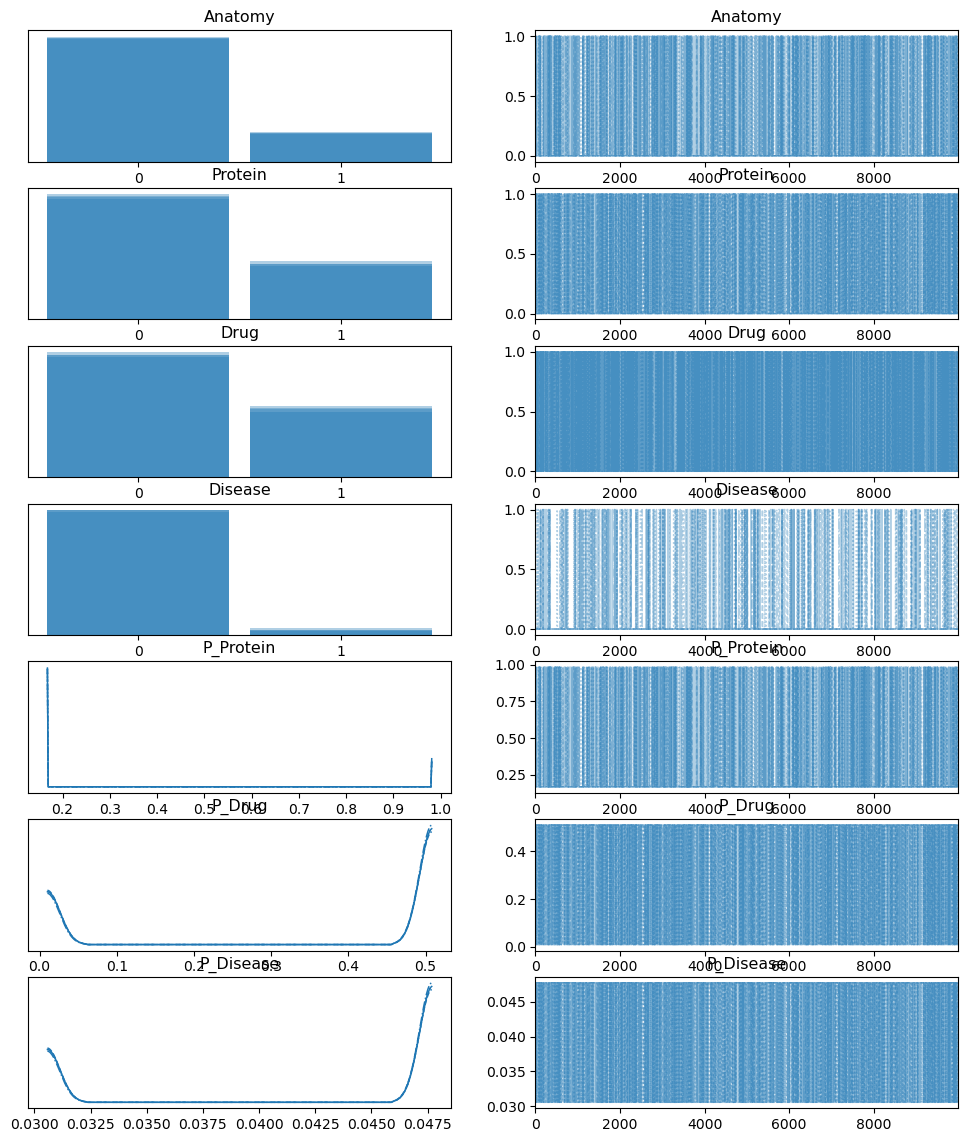

In [53]:
mc.plot_trace(trace)